##**Step 1: Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

##**Step 2: Loading and visualizing the dataset**

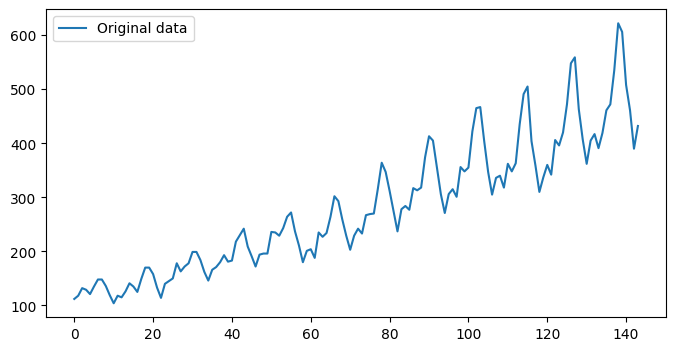

In [2]:
# Load the dataset
passenger_data_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Kaggle/international-airline-passengers.csv"
passenger_dataframe = pd.read_csv(passenger_data_url, usecols=[1], engine='python')

# Plot the original dataset
plt.figure(figsize=(8,4))
plt.plot(passenger_dataframe, label='Original data')
plt.legend()
plt.show()

##**Step 3: Preprocessing the dataset**

In [3]:
passenger_array = passenger_dataframe.values.astype('float32')
scaler_toolbox = MinMaxScaler(feature_range=(0, 1))
normalized_passenger_data = scaler_toolbox.fit_transform(passenger_array)

# Divide into Training and Test Segments
partition_size = int(len(normalized_passenger_data) * 0.67)
remainder_size = len(normalized_passenger_data) - partition_size
train_partition, test_partition = normalized_passenger_data[0:partition_size,:], normalized_passenger_data[partition_size:len(normalized_passenger_data),:]

##**Step 4: Preparing the dataset for LSTM**

In [4]:
def organize_data(sequence_data, history_length=1):
    input_data, target_data = [], []
    for idx in range(len(sequence_data)-history_length-1):
        fragment = sequence_data[idx:(idx+history_length), 0]
        input_data.append(fragment)
        target_data.append(sequence_data[idx + history_length, 0])
    return np.array(input_data), np.array(target_data)

history_length = 1
train_input, train_target = organize_data(train_partition, history_length)
test_input, test_target = organize_data(test_partition, history_length)

train_input = np.reshape(train_input, (train_input.shape[0], 1, train_input.shape[1]))
test_input = np.reshape(test_input, (test_input.shape[0], 1, test_input.shape[1]))

##**Step 5: Building and training the LSTM model**

In [5]:
# Build and Train LSTM Network
flight_model = Sequential()
flight_model.add(LSTM(4, input_shape=(1, history_length)))
flight_model.add(Dense(1))
flight_model.compile(loss='mean_squared_error', optimizer='adam')
flight_model.fit(train_input, train_target, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 6s - loss: 0.0524 - 6s/epoch - 61ms/step
Epoch 2/100
94/94 - 1s - loss: 0.0303 - 609ms/epoch - 6ms/step
Epoch 3/100
94/94 - 1s - loss: 0.0206 - 721ms/epoch - 8ms/step
Epoch 4/100
94/94 - 1s - loss: 0.0171 - 712ms/epoch - 8ms/step
Epoch 5/100
94/94 - 1s - loss: 0.0160 - 888ms/epoch - 9ms/step
Epoch 6/100
94/94 - 1s - loss: 0.0151 - 869ms/epoch - 9ms/step
Epoch 7/100
94/94 - 1s - loss: 0.0141 - 652ms/epoch - 7ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0132 - 317ms/epoch - 3ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0122 - 361ms/epoch - 4ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0110 - 333ms/epoch - 4ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0099 - 414ms/epoch - 4ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0087 - 327ms/epoch - 3ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0076 - 344ms/epoch - 4ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0065 - 301ms/epoch - 3ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0056 - 328ms/epoch - 3ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0047 - 365ms/epoc

##**Step 6: Making predictions and evaluating the model**

2/2 [==============================] - 0s 7ms/step
Training Evaluation: 22.66 RMSE
Testing Evaluation: 51.65 RMSE


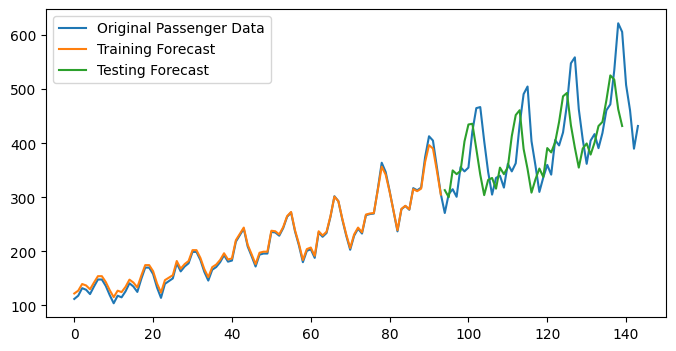

In [6]:
# Make Predictions and Assess Model
train_forecast = flight_model.predict(train_input)
test_forecast = flight_model.predict(test_input)

train_forecast = scaler_toolbox.inverse_transform(train_forecast)
train_target = scaler_toolbox.inverse_transform([train_target])
test_forecast = scaler_toolbox.inverse_transform(test_forecast)
test_target = scaler_toolbox.inverse_transform([test_target])

train_evaluation = np.sqrt(mean_squared_error(train_target[0], train_forecast[:,0]))
print('Training Evaluation: %.2f RMSE' % (train_evaluation))
test_evaluation = np.sqrt(mean_squared_error(test_target[0], test_forecast[:,0]))
print('Testing Evaluation: %.2f RMSE' % (test_evaluation))

# Visualizing Original Data and Forecasts
plt.figure(figsize=(8,4))
plt.plot(scaler_toolbox.inverse_transform(normalized_passenger_data), label='Original Passenger Data')
plt.plot([item for item in train_forecast], label='Training Forecast')
plt.plot([item+len(train_forecast) for item in range(len(test_forecast))], test_forecast, label='Testing Forecast')
plt.legend()
plt.show()